In [19]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
cali_housing = fetch_california_housing(as_frame=True)

In [3]:
print(cali_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
cali_housing
cali_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
cali_housing.frame.head(10)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
5    -122.25        2.697  
6    -122.25        2.992  
7    -122.25        2.414  
8    -122.26        2.267  
9    -122.25        2.611

### Describing the dataset

In [6]:
cali_housing.frame.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

Here we can see that the mean of median income is 3.87, the mean of house age is 28.64, the average rooms in a house is 5.4, and the average occupacy in the house in 3 members. 

### Histograms EDA

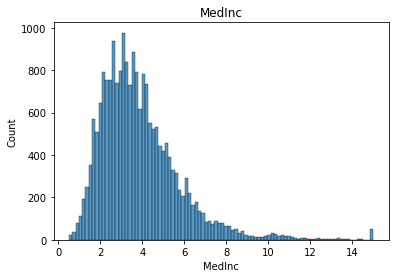

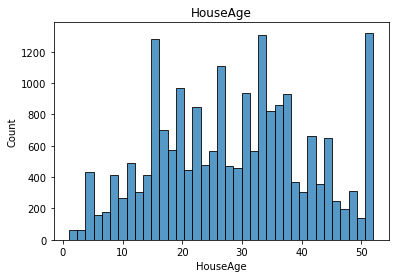

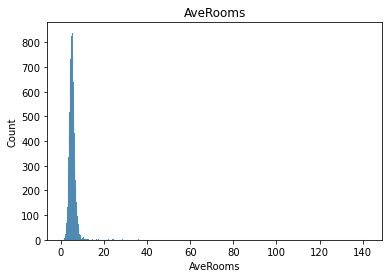

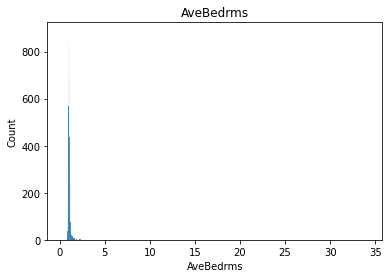

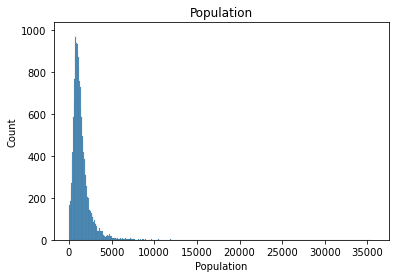

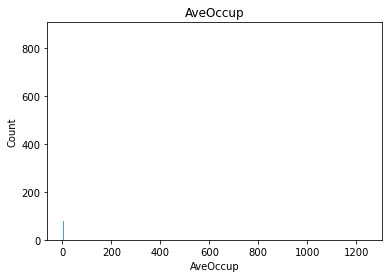

In [8]:
atts = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
for i in atts:
    sns.histplot(x=i, data= cali_housing.frame).set(title=i)
    plt.show()

In MedInc, we see a large portion of the homes tend to be in the median income range 1-6, where we see 2-4 having the highest concentration of homes. House Age does not appear to have a pattern, there are peaks around age 15, 35, and 51 that have the hightest numbers of at that house age. In AveRooms, we see majoirty of the data has an average number of rooms less than 15, while in AveBedrooms, the majority of the data is less than 3 bedrooms.

### Scatterplots

#### HouseAge vs MedInc

[Text(0.5, 1.0, 'HouseAge vs MedInc')]

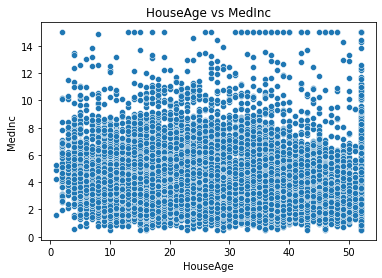

In [11]:
sns.scatterplot(x= "HouseAge", y="MedInc", data= cali_housing.frame).set(title='HouseAge vs MedInc')

#### Longitude vs Latitude by Median House Value

Text(0.5, 0.98, 'Median House Value')

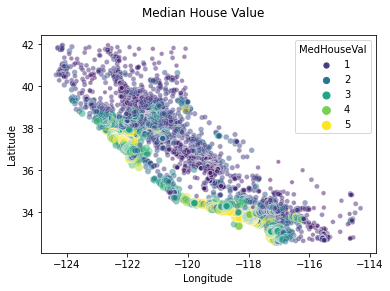

In [12]:
#sns.scatterplot(x= "Longitude", y="Latitude", data= cali, ).set(title='HouseAge vs MedInc')
sns.scatterplot(data=cali_housing.frame, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.suptitle("Comparison of Median Income by Longitude and Latitude")

Based on the scatterplot of longtitude by latitude we can see that the highed Median House Value tends to be on the coastal cities such as the Bay Area and Southern California. While the Central Valley tends to have a lower Median House Value. We can validate this by looking at the MedIncome range below.

#### Longitude vs Latitude by Median House Value 

Text(0.5, 0.98, 'Comparison of Median Income by Longitude and Latitude')

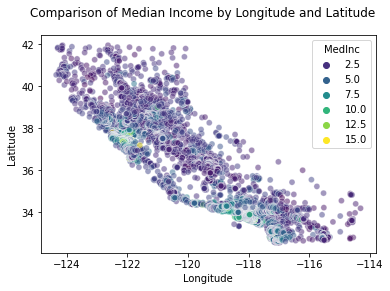

In [8]:
#sns.scatterplot(x= "Longitude", y="Latitude", data= cali, ).set(title='HouseAge vs MedInc')
sns.scatterplot(data=cali_housing.frame, x="Longitude", y="Latitude", hue="MedInc",
                palette="viridis", alpha=0.5)
plt.suptitle("Comparison of Median Income by Longitude and Latitude")

Looking at this graph that is by Median Income, we can see that it does have correlation to the Median House Value. The higher MedInc is also located along the coastal range such as the Bay Area and Southern California. We can also see that the Central Valley does have a lower median income. 

#### 3-D plot of AveRooms vs MedInc vs HouseAge by MedHouseVal

In [13]:
cali_housing.frame.loc[cali_housing.frame['AveRooms']>100]
cali2 = cali_housing.frame.drop(labels=[1914, 1979])

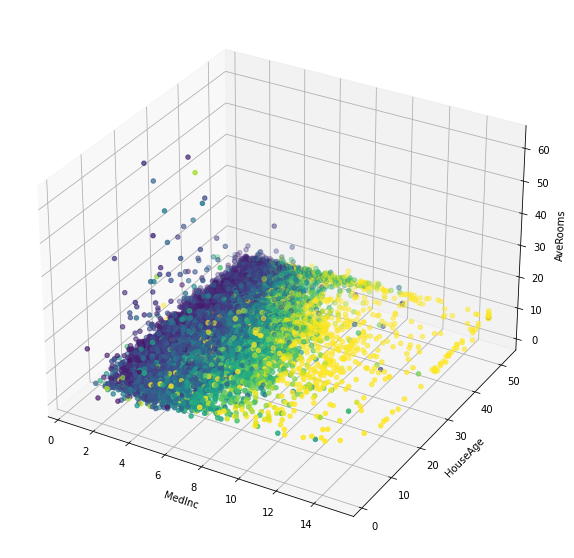

In [17]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(cali2['MedInc'], cali2['HouseAge'], 
           cali2['AveRooms'], c=cali2['MedHouseVal'])
ax.set_xlabel('MedInc')
ax.set_ylabel('HouseAge')
ax.set_zlabel('AveRooms')
plt.show()

We originally dropped the two large outliers, to create a better visualization of the three variables by Median House Value. Using this plot we can see that the higher the median income the average house age tends to increase while the average rooms is below 10 rooms. As the median income gets lower, we see a wider range of average house age tends to be smaller indicating newer houses may be being built. 

#### 3-D plot of AveRooms vs MedInc vs HouseAge by Population

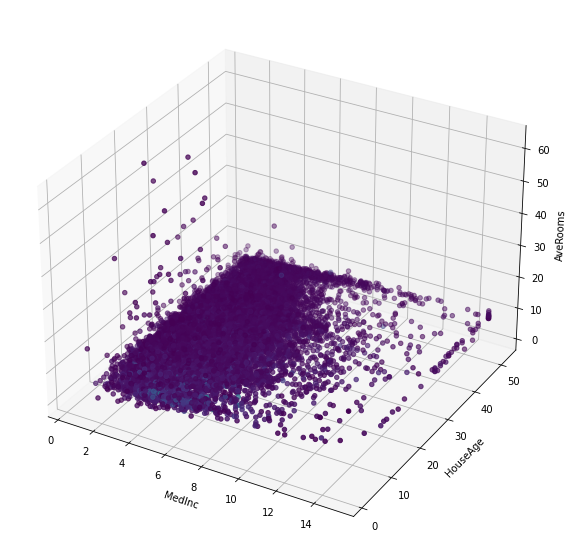

In [26]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot( projection='3d')
ax.scatter(cali2['MedInc'], cali2['HouseAge'], 
           cali2['AveRooms'], c=cali2['Population'])
ax.set_xlabel('MedInc')
ax.set_ylabel('HouseAge')
ax.set_zlabel('AveRooms')
plt.show()

Looking at the same graph by population now, we can see that the larger populations tend to have a median income from 0-8, while the smaller populations will have a larger median income. This also goes for the house age. The larger the population, the more variability there is in the age of the home.

### Pairplot, using the Median Housing Value

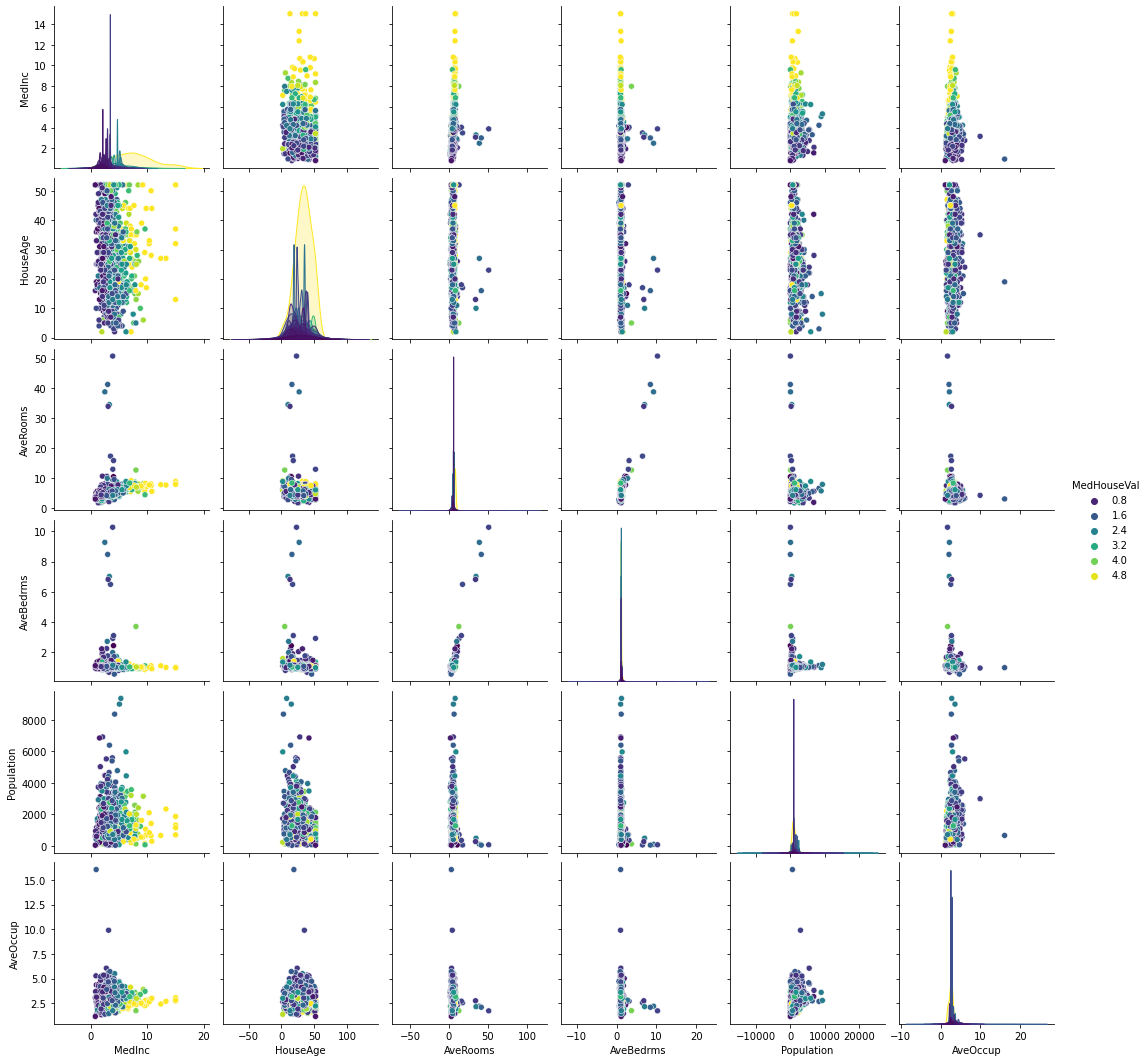

In [22]:
# Drop the unwanted columns
columns_drop = ["Longitude", "Latitude"]
# Random sampling for pair plot since we have 20K samples
random.seed(1234)
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(cali_housing.frame.shape[0]), size=1000,
                     replace=False)
#plot pairplot 
subset = cali_housing.frame.iloc[indices].drop(columns=columns_drop)
sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

### Pandas Profiling

In [41]:
from pandas_profiling import ProfileReport
profile = ProfileReport(cali_housing.frame, title="Cali Housing Pandas Profiling Report")

In [42]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Regression Models

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [28]:
y = cali_housing.frame['MedHouseVal']
X = cali_housing.frame.iloc[:,:8]

In [30]:
random.seed(3254)
models = [LinearRegression(), DecisionTreeRegressor(random_state=42), 
          RandomForestRegressor(random_state=42),
          Lasso(),
          ElasticNet(random_state=42),
          Ridge()]

for model in models:
    print()
    print(model)
    model.fit(X, y)
    mse_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)
    scores = cross_val_score(model, X, y, scoring='r2', cv=10)
    rmse_scores = np.sqrt(-mse_scores)
    print("r2 mean:\n", scores.mean())
    print("RMSE mean:\n", rmse_scores.mean())


LinearRegression()
r2 mean:
 0.5110068610524556
RMSE mean:
 0.7307403363151839

DecisionTreeRegressor(random_state=42)
r2 mean:
 0.24747046591819463
RMSE mean:
 0.8848238571867985

RandomForestRegressor(random_state=42)
r2 mean:
 0.6166854097582033
RMSE mean:
 0.6316825304008727

Lasso()
r2 mean:
 0.08276866237325145
RMSE mean:
 0.9887062629591743

ElasticNet(random_state=42)
r2 mean:
 0.26604730038951657
RMSE mean:
 0.8852732058881339

Ridge()
r2 mean:
 0.5110289965996191
RMSE mean:
 0.7307284159672236


Looking at the regession models built, we see that the RandomForestRegressor has the lowest RMSE score and the highest r2 score. Because of this, we will be chosing this model to graph our predicted Median House Values. The linear regression model had the next highest r2 score, while Lasso had the lowest r2 and the highest RMSE score making it the worst model to choose.

In [37]:
best_model = RandomForestRegressor(random_state=42).fit(X,y)
y_pred=best_model.predict(X)

In [38]:
## Accuracy of model
from sklearn.metrics import r2_score
Accuracy=r2_score(y,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 97.40


#### Plot of predicted vs actual

Text(0.5, 0.98, 'Predicted vs Actual')

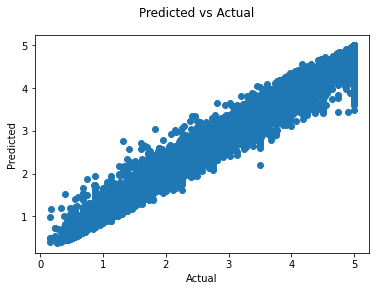

In [40]:
plt.scatter(y,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.suptitle("Predicted vs Actual")

### Conclusion

Looking at our dataset, we can see that MedInc tends to be in the median income range 1-6, where we see 2-4 having the highest concentration of homes. House Age does not appear to have a pattern, there are peaks around age 15, 35, and 51 that have the hightest numbers of at that house age. In AveRooms, we see majoirty of the data has an average number of rooms less than 15, while in AveBedrooms, the majority of the data is less than 3 bedrooms. Looking at the longitude and latitude of the plots we see that MedHouseVal is higher where the MedInc is also high. It also appears to be on the coastal cities, while the valley area has a lower MedHouseVal. In the model built, we chose a Random Forest Regression as it has the highest r2 and the lowest RMSE. We confirmed this was a good model to choose by obtaining an accuracy of 97.4%. 